In [21]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import box, Polygon, MultiPolygon

In [2]:
gdf = gpd.read_file("dataset/l2022_survey_agri_toscana.gpkg")

In [5]:
gdf

,point_id,user_id,point_nuts0,pi_extension,point_ex_ante,point_lat,point_long,point_altitude,point_copernicus,point_grassland,...,lu1_code,poly_area_sqm,surveycprncando,surveycprnlc1n,surveycprnclc1e,surveycprnclc1w,surveycprnclc1s,surveycprnlc,col_hex,geometry
0,35042052,ESSU022,ES,0,0,41.095030,0.287315,387,1,0,...,U111,998.242311,1,10,31,7,12,B82,ff6666,"POLYGON ((16.60476 42.26177, 16.60476 42.26177..."
1,37361854,ESSU041,ES,0,0,39.542430,3.223064,139,1,0,...,U111,4341.839684,1,51,51,12,12,B81,702600,"POLYGON ((14.76029 43.93458, 14.76029 43.93458..."
2,37181848,ESSU041,ES,0,0,39.473620,3.021257,113,1,0,...,U111,6509.550981,1,51,39,51,39,B74,a50000,"POLYGON ((14.73283 43.78138, 14.73283 43.78138..."
3,32802282,ESSU011,ES,0,0,42.846770,-2.766102,495,1,0,...,U111,3208.350311,1,18,40,23,40,B52,00af49,"POLYGON ((18.73827 40.66547, 18.73827 40.66547..."
4,35762168,ESSU023,ES,0,0,42.214930,0.984361,569,1,0,...,U111,2697.136613,1,7,6,45,36,B81,702600,"POLYGON ((17.44445 43.00888, 17.44424 43.00900..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,34641972,ESSU022,ES,0,0,40.331110,-0.068048,561,1,0,...,U111,687.129882,1,10,7,26,6,E20,ccf24d,"POLYGON ((16.00724 41.83385, 16.00724 41.83385..."
5649,34621996,ESSU022,ES,0,0,40.543720,-0.125695,921,1,0,...,U111,8196.581183,1,51,51,51,51,E10,ccf24d,"POLYGON ((16.20308 41.84616, 16.20308 41.84616..."
5650,32042270,ESSU011,ES,0,0,42.620228,-3.656848,992,1,0,...,U111,81.757668,1,5,5,5,5,E10,ccf24d,"POLYGON ((18.72183 40.00758, 18.72183 40.00758..."
5651,28622026,PTSU007,PT,0,0,39.838700,-7.116621,313,1,1,...,U111,99.669196,1,6,5,5,6,A22,ccf24d,"POLYGON ((17.09074 36.75541, 17.09074 36.75541..."


In [14]:
codes_names = {
    "B82": "Vineyards",
    "B81": "Olive groves",
    "B74": "Nuts trees",
    "B52": "Lucerne",
    "B11": "Common wheat",
    "E30": "Spontaneously re-vegetated surfaces",
    "F40": "Other bare soil",
    "B13": "Barley",
    "D20": "Shrubland without tree cover",
    "B16": "Maize",
    "E20": "Grassland without tree/shrub cover",
    "E10": "Grassland with sparse tree/shrub cover",
    "B41": "Dry pulses",
    "B31": "Sunflower",
    "B15": "Oats",
    "B84": "Permanent industrial crops",
    "B12": "Durum wheat",
    "B42": "Tomatoes",
    "B54": "Mixed cereals for fodder",
    "C10": "Broadleaved woodland",
    "B23": "Other root crops",
    "A22": "Non built-up linear features",
    "B43": "Other fresh vegetables",
    "B32": "Rape and turnip rape",
    "B33": "Soya",
    "D10": "Shrubland with sparse tree cover",
    "B14": "Rye",
    "G11": "Inland fresh water bodies",
    "B18": "Triticale",
    "B73": "Cherry fruit",
    "B37": "Other non-permanent industrial crops",
    "B35": "Other fibre and oleaginous crops",
    "B55": "Temporary grasslands",
    "F10": "Rocks and stones",
    "B75": "Other fruit trees and berries",
    "B53": "Other leguminous and mixtures for fodder",
    "B36": "Tobacco",
    "B83": "Nurseries",
    "C22": "Pine dominated coniferous woodland",
    "B72": "Pear fruit",
    "A30": "Other artificial areas",
    "A11": "Buildings with one to three floors",
    "B19": "Other cereals",
    "B17": "Rice",
    "A21": "Non built-up area features",
    "B76": "Oranges",
    "A13": "Greenhouses",
    "B77": "Other citrus fruit",
    "B34": "Cotton",
    "B22": "Sugar beet",
    "B21": "Potatoes",
    "G21": "Inland fresh running water",
    "B71": "Apple fruit",
    "C33": "Other mixed woodland",
    "B51": "Clovers",
    "B44": "Floriculture and ornamental plants",
    "C32": "Pine dominated mixed woodland",
    "H21": "Coastal wetlands",
}

In [15]:
gdf["surveycprnlc"].unique()    

array(['B82', 'B81', 'B74', 'B52', 'B11', 'E30', 'F40', 'B13', 'D20',
       'B16', 'E20', 'E10', 'B41', 'B31', 'B15', 'B84', 'B12', 'B42',
       'B54', 'C10', 'B23', 'A22', 'B43', 'B32', 'B33', 'D10', 'B14',
       'G11', 'B18', 'B73', 'B37', 'B35', 'B55', 'F10', 'B75', 'B53',
       'B36', 'B83', 'C22', 'B72', 'A30', 'A11', 'B19', 'B17', 'A21',
       'B76', 'A13', 'B77', 'B34', 'B22', 'B21', 'G21', 'B71', 'C33',
       'B51', 'B44', 'C32', 'H21'], dtype=object)

In [22]:
sums_counts = gdf.groupby("surveycprnlc").agg(
    poly_area_sqm_sum=pd.NamedAgg(column="poly_area_sqm", aggfunc="sum"),
    count=pd.NamedAgg(column="poly_area_sqm", aggfunc="count")
).sort_values("poly_area_sqm_sum", ascending=False).reset_index()

In [27]:
sums_counts["names"] = sums_counts["surveycprnlc"].map(codes_names)

<Axes: xlabel='names'>

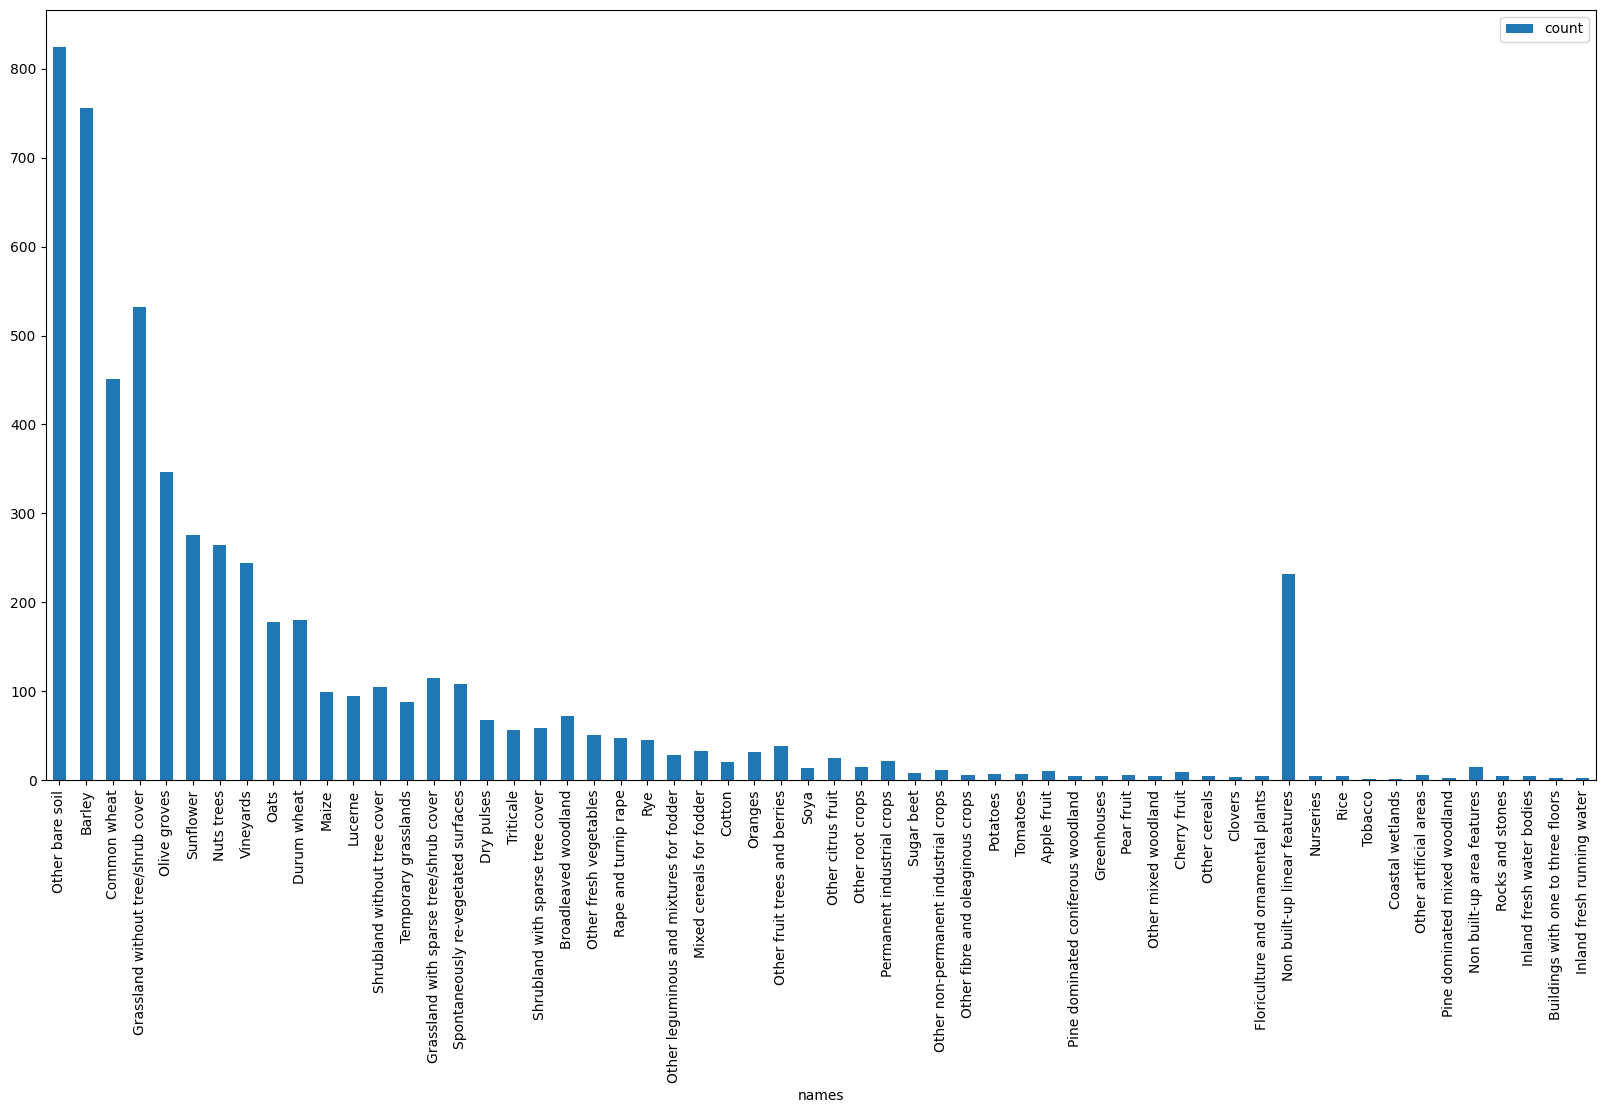

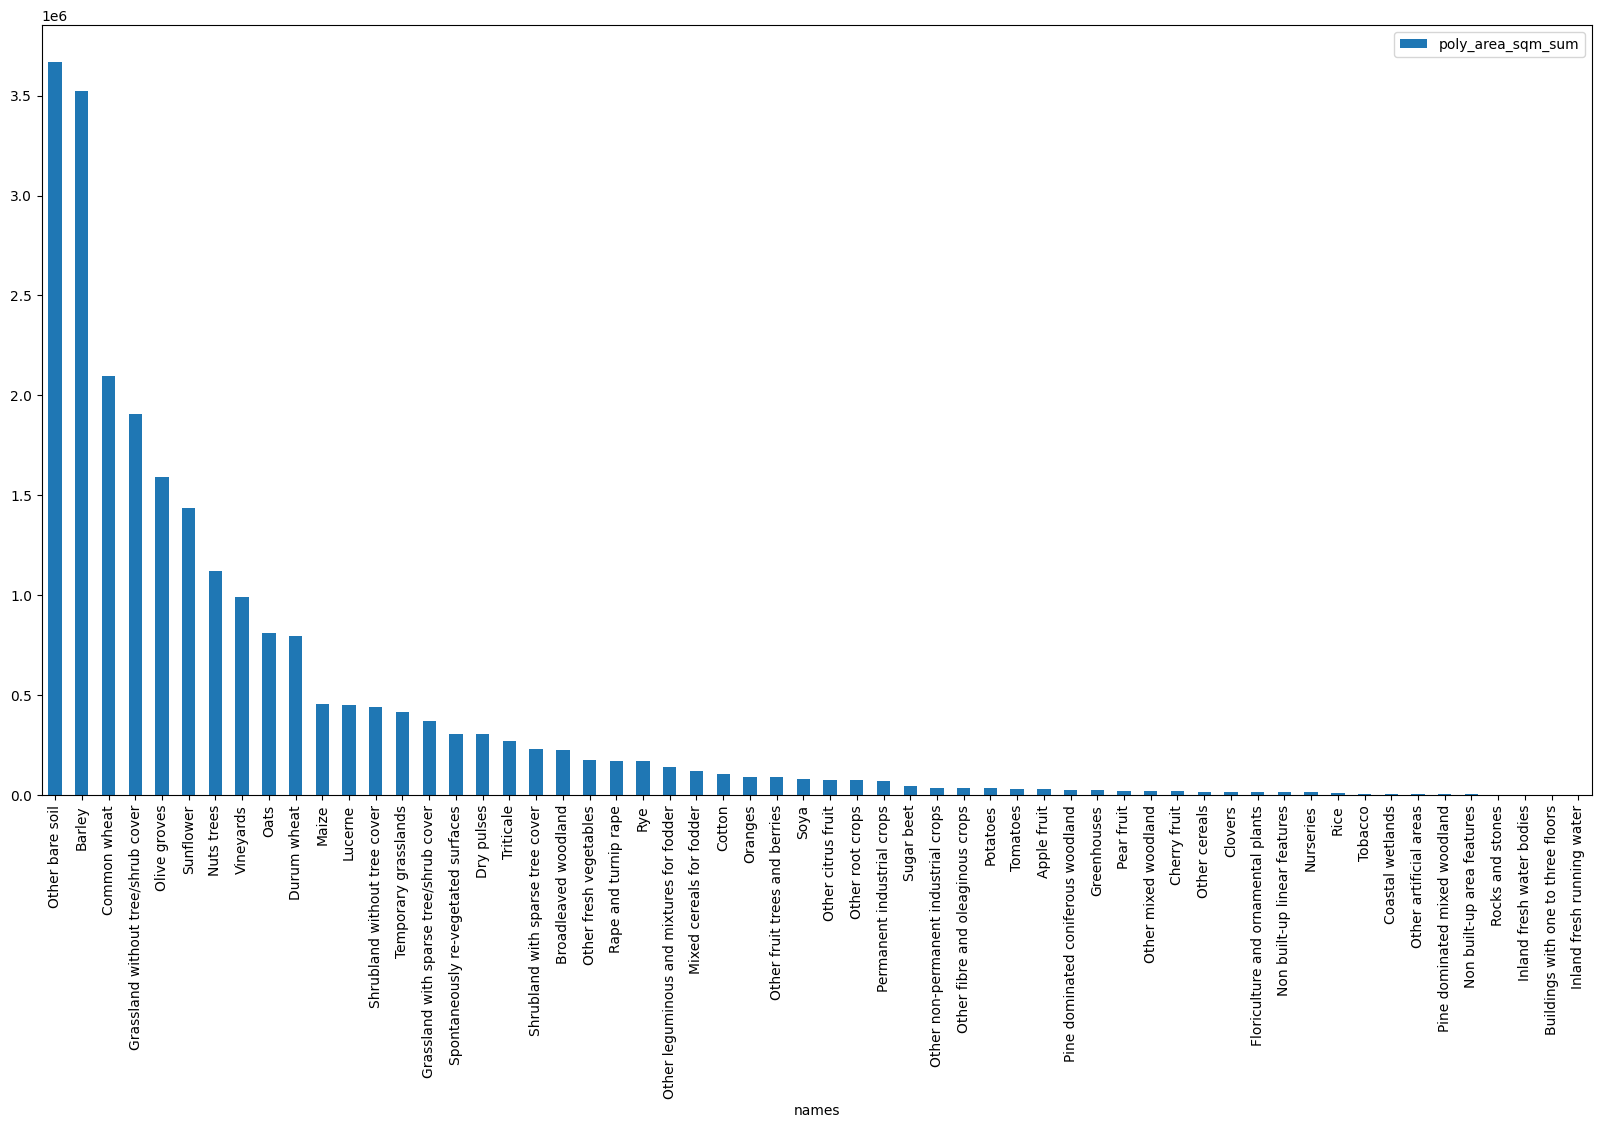

In [31]:
# Make to charts one for count and one for area
sums_counts.plot.bar(x="names", y="count", figsize=(20, 10))
sums_counts.plot.bar(x="names", y="poly_area_sqm_sum", figsize=(20, 10))

In [32]:
sums_counts

,surveycprnlc,poly_area_sqm_sum,count,names
0,F40,3.670126e+06,825,Other bare soil
1,B13,3.522944e+06,756,Barley
2,B11,2.095447e+06,451,Common wheat
3,E20,1.907686e+06,532,Grassland without tree/shrub cover
4,B81,1.592451e+06,347,Olive groves
5,B31,1.435881e+06,276,Sunflower
6,B74,1.120686e+06,264,Nuts trees
7,B82,9.920791e+05,244,Vineyards
8,B15,8.100839e+05,178,Oats
9,B12,7.962103e+05,180,Durum wheat


KeyError: 'poly_area_sqm'

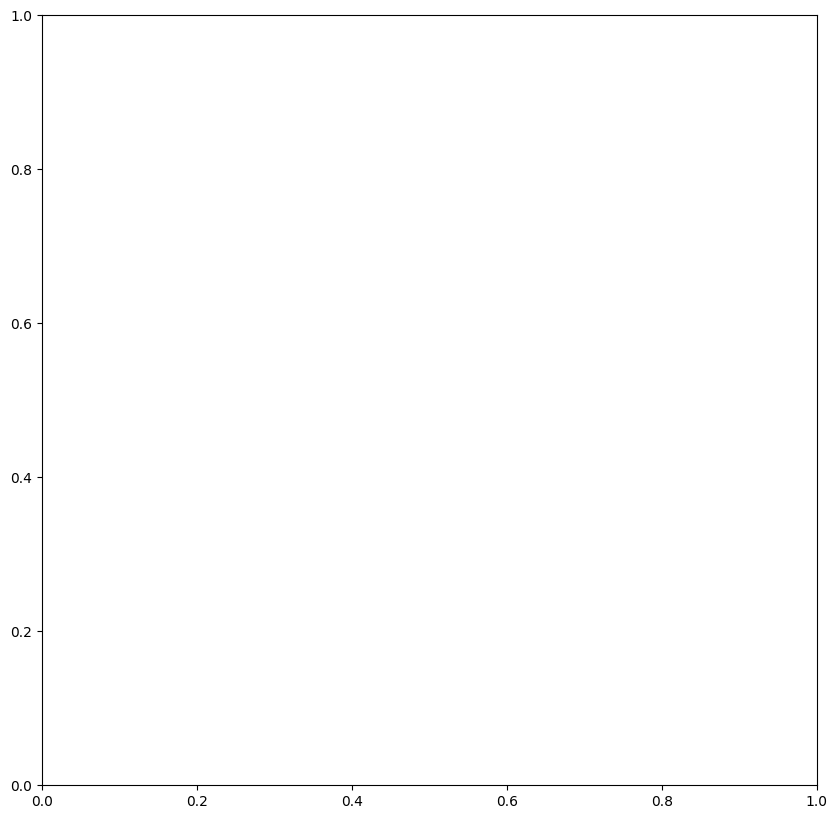

In [29]:
# Plot a bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
sums_counts.plot.barh(x="names", y="poly_area_sqm", ax=ax)